In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

**MSSubClass**: The building class**(should be class type)**

**MSZoning:** The general zoning classification

**LotFrontage:** Linear feet of street connected to property

**LotArea:** Lot size in square feet

**Street:** Type of road access**(should be class type)**

**Alley:** Type of alley access**(should be class type)**

**LotShape:** General shape of property

**LandContour:** Flatness of the property

**Utilities:** Type of utilities available**(should be class type)**

**LotConfig:** Lot configuration

**LandSlope:** Slope of property

**Neighborhood:** Physical locations within Ames city limits

**Condition1:** Proximity to main road or railroad

**Condition2:** Proximity to main road or railroad (if a second is present)

**BldgType:** Type of dwelling**(should be class type)**

**HouseStyle:** Style of dwelling**(should be class type)**

**OverallQual:** Overall material and finish quality

**OverallCond:** Overall condition rating

**YearBuilt:** Original construction date **(should be class type)**

**YearRemodAdd:** Remodel date**(should be class type)**

**RoofStyle:** Type of roof**(should be class type)**

**RoofMatl:** Roof material**(should be class type)**

**Exterior1st:** Exterior covering on house

**Exterior2nd:** Exterior covering on house (if more than one material)

**MasVnrType:** Masonry veneer type

**MasVnrArea:** Masonry veneer area in square feet

**ExterQual:** Exterior material quality

**ExterCond:** Present condition of the material on the exterior

**Foundation:** Type of foundation


**BsmtQual:** Height of the basement

**BsmtCond:** General condition of the basement

**BsmtExposure:** Walkout or garden level basement walls

**BsmtFinType1:** Quality of basement finished area

**BsmtFinSF1:** Type 1 finished square feet

**BsmtFinType2:** Quality of second finished area (if present)

**BsmtFinSF2:** Type 2 finished square feet

**BsmtUnfSF:** Unfinished square feet of basement area

**TotalBsmtSF:** Total square feet of basement area

**Heating:** Type of heating(should be class type)

**HeatingQC:** Heating quality and condition

**CentralAir:** Central air conditioning

**Electrical:** Electrical system**(should be class type)**

**1stFlrSF:** First Floor square feet

**2ndFlrSF:** Second floor square feet

**LowQualFinSF:** Low quality finished square feet (all floors)

**GrLivArea:** Above grade (ground) living area square feet

**BsmtFullBath:** Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**FullBath**: Full bathrooms above grade

**HalfBath**: Half baths above grade

**Bedroom**: Number of bedrooms above basement level

**Kitchen**: Number of kitchens

**KitchenQual**: Kitchen quality

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Functional**: Home functionality rating

**Fireplaces**: Number of fireplaces

**FireplaceQu**: Fireplace quality

**GarageType**: Garage location

**GarageYrBlt**: Year garage was built

**GarageFinish**: Interior finish of the garage

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

**GarageQual**: Garage quality

**GarageCond**: Garage condition

**PavedDrive**: Paved driveway

**WoodDeckSF**: Wood deck area in square feet

**OpenPorchSF**: Open porch area in square feet

**EnclosedPorch**: Enclosed porch area in square feet

**3SsnPorch**: Three season porch area in square feet

**ScreenPorch**: Screen porch area in square feet

**PoolArea**: Pool area in square feet

**PoolQC**: Pool quality

**Fence**: Fence quality

**MiscFeature**: Miscellaneous feature not covered in other categories

**MiscVal**: $Value of miscellaneous feature

**MoSold**: Month Sold(drop it)

**YrSold**: Year Sold**((should be class type))**

**SaleType**: Type of sale**(should be class type)**

**SaleCondition:** Condition of sale

# Load Data

In [2]:
train_frame=pd.read_csv("../data/train.csv",index_col=0)
test_frame=pd.read_csv("../data/test.csv",index_col=0)

# train_frame

In [3]:
train_frame.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#shape
train_frame.shape

(1460, 80)

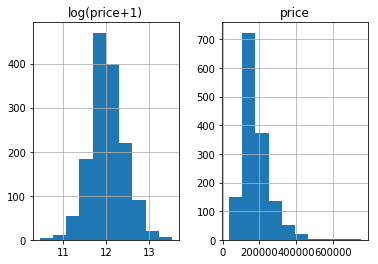

In [5]:
#观察price的分布,其中log1p把price平滑化
price_frame=pd.DataFrame(data={"price":train_frame["SalePrice"],
                         "log(price+1)":np.log1p(train_frame["SalePrice"])} )
price_frame.hist()
plt.show()

In [6]:
#弹出训练集的价格,并且平滑化
y_train=np.log1p(train_frame.pop("SalePrice"))

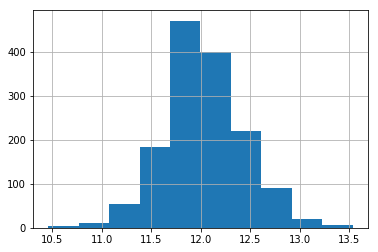

In [7]:
y_train.hist()
plt.show()

# test_frame

In [8]:
test_frame.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [9]:
#shape
test_frame.shape

(1459, 79)

# concat

In [10]:
#合并测试集和训练集
all_frame=pd.concat((train_frame,test_frame),axis=0)

In [11]:
all_frame.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [12]:
#shape
all_frame.shape

(2919, 79)

# trans type 

在一开始,就锁定的几个特征应该是类别型的特征,类别型好的特征应该是字符型的,不应该是数值型的,所以对于数值类型的要改变类型,同时,对于类别超级多的可以进行一些降维处理.下面这些特征都应该归类于类别特征.

**MSSubClass**

**Street:**

**Alley:** 

**Utilities:**

**BldgType:**

**HouseStyle:**

**YearBuilt:**

**YearRemodAdd:**

**RoofStyle:** 

**RoofMatl:**

**Electrical:**

**YrSold**: 

**SaleType**:

一个一个的看.

In [13]:
#因为MSSubClass这个属性没有数学上的大小关系等含义,吧其中的元素变为字符串类型作为类别
#当然,其他是整形但是没有大小关系只表示类别的也都要转换为str类型.
all_frame["MSSubClass"].dtype

dtype('int64')

In [14]:
all_frame["MSSubClass"]=all_frame["MSSubClass"].astype(str)

In [15]:
all_frame["MSSubClass"].dtype

dtype('O')

In [16]:
all_frame["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

In [17]:
#Street 
#发现类型是str,意味着不需要变化.
all_frame["Street"].dtype

dtype('O')

In [18]:
all_frame["Street"].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [19]:
#Alley
#类型也是str,不需要变化
all_frame["Alley"].dtype

dtype('O')

In [20]:
all_frame["Alley"].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [21]:
#Utilities
#str类型,不需要变化
all_frame["Utilities"].dtype

dtype('O')

In [22]:
all_frame["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [23]:
#BldgType
#str类型,不需要变化
all_frame["BldgType"].dtype

dtype('O')

In [24]:
all_frame["BldgType"].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [25]:
#HouseStyle
all_frame["HouseStyle"].dtype

dtype('O')

In [26]:
all_frame["HouseStyle"].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [27]:
#YearBuilt
#这个很重要,因为year其实挺多的,与其作为一个值,还不如作为一个类别,表示年代的久远程度
all_frame["YearBuilt"].dtype

dtype('int64')

In [28]:
all_frame["YearBuilt"].value_counts()

2005    142
2006    138
2007    109
2004     99
2003     88
1977     57
1920     57
1976     54
1999     52
2008     49
1958     48
2000     48
2002     47
1998     46
1968     45
1959     43
1954     43
1910     43
1970     42
1967     41
1972     40
1956     39
1971     39
1978     39
1993     39
1950     38
1994     37
1960     37
1940     36
1966     35
       ... 
1982      7
1931      7
1985      7
1942      6
1912      5
1919      5
1932      5
1880      5
1934      5
2010      3
1905      3
1895      3
1917      3
1908      2
1885      2
1901      2
1892      2
1882      1
1896      1
1898      1
1902      1
1907      1
1904      1
1906      1
1913      1
1911      1
1875      1
1879      1
1893      1
1872      1
Name: YearBuilt, Length: 118, dtype: int64

对于上面的年代来看的话,最早的年代为18xx年,所以

把1900之前的单独归为一类.值为0. 

1900-1950作为一类,值为1.

1950到1990作为一类值为2.

1990到2000作为一类,值为3,

2000以上的作为一类,值为4



In [29]:
#改变值为4个类别
all_frame.loc[all_frame["YearBuilt"]<1900,"YearBuilt"]=0
all_frame.loc[(all_frame["YearBuilt"]>=1900) & (all_frame["YearBuilt"]<1950),"YearBuilt"]=1
all_frame.loc[(all_frame["YearBuilt"]>=1950) & (all_frame["YearBuilt"]<1990),"YearBuilt"]=2
all_frame.loc[(all_frame["YearBuilt"]>=1990) & (all_frame["YearBuilt"]<2000),"YearBuilt"]=3
all_frame.loc[all_frame["YearBuilt"]>=2000,"YearBuilt"]=4

In [30]:
all_frame["YearBuilt"].value_counts()

2    1172
4     783
1     606
3     332
0      26
Name: YearBuilt, dtype: int64

In [31]:
#改变为str类型
all_frame["YearBuilt"]=all_frame["YearBuilt"].astype(str)

In [32]:
all_frame["YearBuilt"].dtype

dtype('O')

In [33]:
#YearRemodAdd
all_frame["YearRemodAdd"].dtype

dtype('int64')

In [34]:
all_frame["YearRemodAdd"].value_counts()

1950    361
2006    202
2007    164
2005    141
2004    111
2000    104
2003     99
2002     82
2008     81
1998     77
1999     60
1996     59
1995     56
1994     53
1997     49
2001     49
1976     48
1977     46
1970     44
1993     43
1968     39
1978     36
1972     35
1958     34
2009     34
1967     34
1992     32
1971     31
1959     30
1963     30
       ... 
1956     30
1990     29
1960     29
1991     29
1954     28
1965     28
1966     27
1962     26
1980     26
1964     26
1969     26
1955     25
1979     24
1961     24
1973     21
1957     20
1953     20
1984     19
1974     19
1989     18
1987     16
1988     15
1952     15
1985     14
1951     14
2010     13
1981     12
1986     12
1983     11
1982      9
Name: YearRemodAdd, Length: 61, dtype: int64

In [35]:
#按照上面的方式来归类
all_frame.loc[all_frame["YearRemodAdd"]<1900,"YearRemodAdd"]=0
all_frame.loc[(all_frame["YearRemodAdd"]>=1900) & (all_frame["YearRemodAdd"]<1950),"YearRemodAdd"]=1
all_frame.loc[(all_frame["YearRemodAdd"]>=1950) & (all_frame["YearRemodAdd"]<1990),"YearRemodAdd"]=2
all_frame.loc[(all_frame["YearRemodAdd"]>=1990) & (all_frame["YearRemodAdd"]<2000),"YearRemodAdd"]=3
all_frame.loc[all_frame["YearRemodAdd"]>=2000,"YearRemodAdd"]=4

In [36]:
all_frame["YearRemodAdd"].value_counts()

2    1352
4    1080
3     487
Name: YearRemodAdd, dtype: int64

In [40]:
all_frame["YearRemodAdd"]=all_frame["YearRemodAdd"].astype(str)
all_frame["YearRemodAdd"].dtype

dtype('O')

In [41]:
#RoofStyle
all_frame["RoofStyle"].dtype

dtype('O')

In [42]:
all_frame["RoofStyle"].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [43]:
#RoofMatl
all_frame["RoofMatl"].dtype

dtype('O')

In [45]:
all_frame["RoofMatl"].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
Metal         1
ClyTile       1
Membran       1
Roll          1
Name: RoofMatl, dtype: int64

In [46]:
#Electrical
all_frame["Electrical"].dtype

dtype('O')

In [47]:
all_frame["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [49]:
#YrSold
all_frame["YrSold"].dtype

dtype('int64')

In [50]:
all_frame["YrSold"].value_counts()

2007    692
2009    647
2008    622
2006    619
2010    339
Name: YrSold, dtype: int64

In [51]:
all_frame["YrSold"]=all_frame["YrSold"].astype(str)
all_frame["YrSold"].dtype

dtype('O')

In [52]:
#SaleType
all_frame["SaleType"].dtype

dtype('O')

In [53]:
all_frame["SaleType"].value_counts()

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

# statistic

In [37]:
all_frame["MSSubClass"].value_counts()

20     1079
60      575
50      287
120     182
30      139
70      128
160     128
80      118
90      109
190      61
85       48
75       23
45       18
180      17
40        6
150       1
Name: MSSubClass, dtype: int64

# one-hot encoding

In [38]:
all_frame_dummy=pd.get_dummies(data=all_frame)

In [39]:
all_frame_dummy.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,4,196.0,706.0,0.0,150.0,856.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,2,0.0,978.0,0.0,284.0,1262.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,4,162.0,486.0,0.0,434.0,920.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,2,0.0,216.0,0.0,540.0,756.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,4,350.0,655.0,0.0,490.0,1145.0,...,0,0,0,1,0,0,0,0,1,0
